In [1]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

In [3]:
# For division
from __future__ import division

In [4]:
# List of Tech_stocks for analytics
tech_list = ['AAPL']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-3,end.month,end.day)
print(start)

#For-loop for grabing google finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)


2016-10-21 00:00:00


In [5]:
AAPL.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-10-21,116.910004,116.279999,116.809998,116.599998,23192700.0,111.147491
2016-10-24,117.739998,117.000000,117.099998,117.650002,23538700.0,112.148384
2016-10-25,118.360001,117.309998,117.949997,118.250000,48129000.0,112.720345
2016-10-26,115.699997,113.309998,114.309998,115.589996,66134200.0,110.184723
2016-10-27,115.860001,114.099998,115.389999,114.480003,34562000.0,109.126633


In [25]:
AAPL.tail(5)

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2019-10-15,237.649994,234.880005,236.389999,235.320007,21840000.0,235.320007,228.277000,224.4465,215.4108,-0.002332
2019-10-16,235.240005,233.199997,233.369995,234.369995,18475800.0,234.369995,229.817999,225.0265,216.1582,-0.004037
2019-10-17,236.149994,233.520004,235.089996,235.279999,16896300.0,235.279999,231.263998,225.7425,216.8830,0.003883
2019-10-18,237.580002,234.289993,234.589996,236.410004,24358400.0,236.410004,232.203999,226.6765,217.5426,0.004803
2019-10-21,240.990005,237.479996,237.520004,240.509995,22367483.0,240.509995,233.548999,227.7660,218.3330,0.017343


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2016-10-21 to 2019-10-21
Data columns (total 6 columns):
High         754 non-null float64
Low          754 non-null float64
Open         754 non-null float64
Close        754 non-null float64
Volume       754 non-null float64
Adj Close    754 non-null float64
dtypes: float64(6)
memory usage: 41.2 KB


In [8]:
AAPL.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,754.000000,754.000000,754.000000,754.000000,7.540000e+02,754.000000
mean,174.146923,171.185106,172.612666,172.719151,3.018269e+07,169.334252
std,31.185753,30.408601,30.783004,30.767112,1.282541e+07,31.931590
min,107.680000,104.080002,106.570000,105.709999,1.136200e+07,101.284096
25%,154.010006,151.554996,153.245007,153.149998,2.150215e+07,148.441322
50%,174.370003,171.589996,172.815002,172.800003,2.688765e+07,169.360008
75%,196.717495,193.147495,194.842499,194.660000,3.480805e+07,193.445019
max,240.990005,237.479996,237.520004,240.509995,1.119850e+08,240.509995


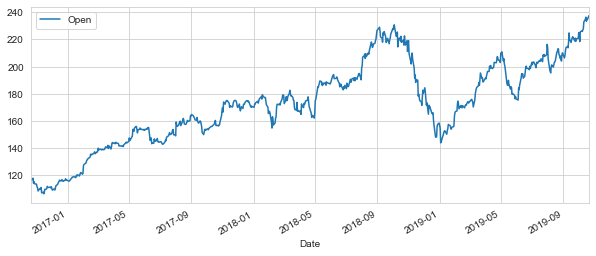

In [10]:
AAPL['Open'].plot(legend = True, figsize = (10,4))

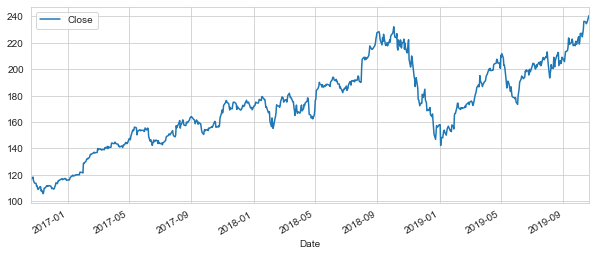

In [11]:
AAPL['Close'].plot(legend=True, figsize=(10,4))

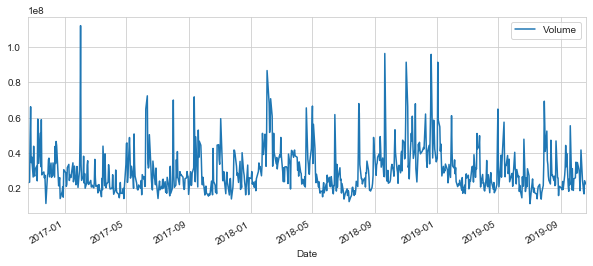

In [12]:
# Now let's plot the total volume of stock being traded each day over the past year
AAPL['Volume'].plot(legend=True, figsize=(10,4))

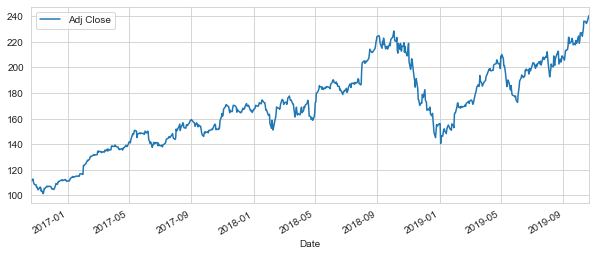

In [13]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

In [14]:
close = AAPL['Close']
MA_day = [10,20,50]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = close.rolling(window = ma).mean()

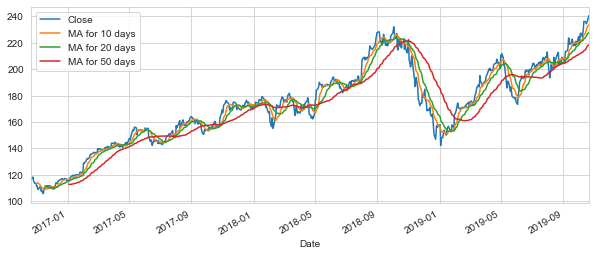

In [15]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

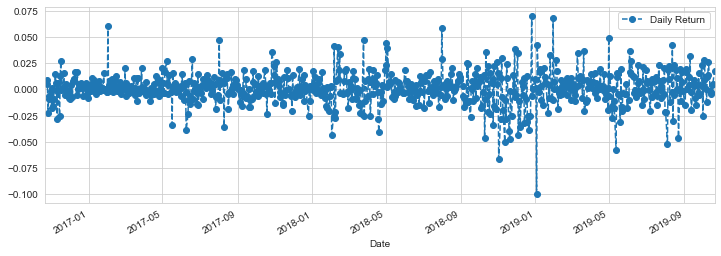

In [16]:
AAPL['Daily Return'] = AAPL['Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

In [17]:
dfreg = AAPL.loc[:,['Adj Close','Volume',]]
dfreg['HL_PCT'] = (AAPL['High']-AAPL['Low']) / AAPL['Close'] * 100.0
dfreg['PCT_change'] = (AAPL['Close'] - AAPL['Open']) / AAPL['Open'] * 100

In [18]:
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2016-10-21,111.147491,23192700.0,0.540313,-0.179778
2016-10-24,112.148384,23538700.0,0.628982,0.469687
2016-10-25,112.720345,48129000.0,0.887952,0.254348
2016-10-26,110.184723,66134200.0,2.067652,1.119761
2016-10-27,109.126633,34562000.0,1.537388,-0.788626


In [19]:
#df.ewm(span=60).mean()
df = AAPL

In [20]:
train_start_date = '2009-01-01'
train_end_date = '2017-12-31'
test_start_date = '2018-01-01'
test_end_date = datetime.now()
train = df.loc[train_start_date : train_end_date]
test = df.loc[test_start_date:test_end_date]


In [21]:
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

In [22]:
def offset_value(test_start_date, test, df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'Adj Close']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += df.loc[temp_date, 'Adj Close']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

In [24]:
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
prediction_list = []

In [52]:
#from treeinterpreter import treeinterpreter as ti
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor